In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='darkgrid')

In [ ]:
import pandas as pd
import urllib.request
from scipy.io.arff import loadarff
from io import StringIO

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00264/EEG%20Eye%20State.arff'
resp = urllib.request.urlopen(url)
data, meta = loadarff(StringIO(resp.read().decode('utf-8')))

df = pd.DataFrame(data)

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.decode('UTF-8')

X, y = df.iloc[:, :5], df.iloc[:, -1]

In [ ]:
df.head()


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  object 
dtypes: float64(14), object(1)
memory usage: 1.7+ MB


In [ ]:
df.describe()


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


In [ ]:
df.groupby('AF4').count()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,eyeDetection
AF4,,,,,,,,,,,,,,
1366.15,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4205.64,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4212.31,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4214.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4216.41,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571.79,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4573.33,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5022.56,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X, y)
ypred =  modelo.predict(X)
intercept_ypred = modelo.intercept_
coef_ypred = modelo.coef_
print("Valor do Intercept: ", intercept_ypred)
print("Valor dos coeficientes da Regressão Linear: ", coef_ypred)

Valor do Intercept:  [-8.31705257e-07]
Valor dos coeficientes da Regressão Linear:  [[ 0.01104811 -0.01792678  0.01343843 -0.01061587  0.00244009]]


In [ ]:
from sklearn.metrics import mean_squared_error

mse_ypred = mean_squared_error(y, ypred)
print("Valor MSE: ", mse_ypred)

Valor MSE:  0.4128838451268358


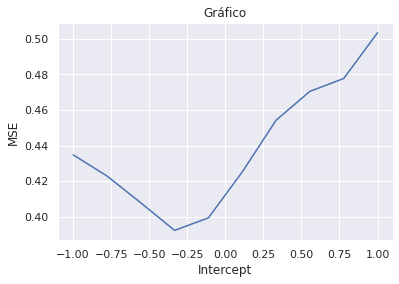

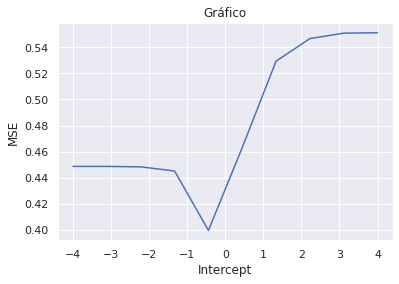

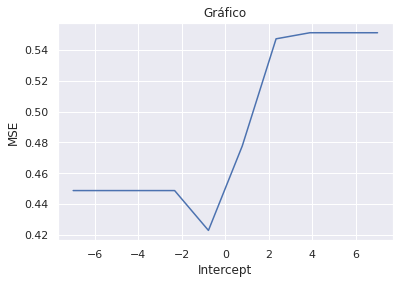

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1
iteracoes = 10

for i in range(3 * modelo.intercept_.shape[0]):

    intercept_range = np.linspace(intercept_ypred - delta, intercept_ypred + delta, iteracoes)
    delta = delta + 3
    
    mse = []

    for i in range(iteracoes):
        modelo.intercept_ = intercept_range[i]
        ypred =  modelo.predict(X)
        mse.append(mean_squared_error(y, ypred))

    plt.title("Gráfico")
    plt.ylabel("MSE")
    plt.xlabel("Intercept")
    plt.plot(intercept_range, mse)
    plt.show()

In [ ]:
import numpy as np


class KNN(object):
    def __init__(self, k, metrica='euclidiana'):
        self.k = k
        self.metrica = metrica

    def distancia(self, ponto_a, ponto_b):
        somatorio = 0
        
        if self.metrica == 'manhattan':
            for i in range(len(ponto_a)):
                somatorio += abs(ponto_b[i] - ponto_a[i])
            
            return somatorio
                
        elif self.metrica == 'euclidiana':
            for i in range(len(ponto_a)):
                somatorio += (ponto_b[i] - ponto_a[i]) ** 2
            
            return somatorio ** 0.5 
    
    def ordenar_vizinhos(self):
        self.vizinhos = sorted(self.vizinhos, key=lambda vizinho: vizinho[0])
    
    def treinar(self, X, y):
        self.X = X
        self.y = y
        
    def classificar(self, x):
        self.vizinhos = []
        
        for i in range(len(self.X)):
            self.vizinhos.append((self.distancia(x, self.X[i]), self.y[i]))
            
        self.ordenar_vizinhos()
        
        y_ocorrencias = {}
        
        for i in range(self.k):
            if self.vizinhos[i][1] in y_ocorrencias:
                y_ocorrencias[self.vizinhos[i][1]] += 1
            
            else:
                y_ocorrencias[self.vizinhos[i][1]] = 1
        
        y_mais_ocorrente = None
        
        for y in y_ocorrencias:
            if y_mais_ocorrente == None or y_ocorrencias[y] > y_ocorrencias[y_mais_ocorrente]:
                y_mais_ocorrente = y

        return y_mais_ocorrente